In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananyahegde058","key":"20410cd5f264805caf8ccb92ea8ce57a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d google/google-landmarks-dataset

Dataset URL: https://www.kaggle.com/datasets/google/google-landmarks-dataset
License(s): other
  0% 0.00/1.12k [00:00<?, ?B/s]
100% 1.12k/1.12k [00:00<00:00, 2.98MB/s]


In [4]:
!unzip /content/google-landmarks-dataset.zip -d /content/google-landmarks

Archive:  /content/google-landmarks-dataset.zip
  inflating: /content/google-landmarks/boxes_split1.csv  
  inflating: /content/google-landmarks/boxes_split2.csv  
  inflating: /content/google-landmarks/index.csv  
  inflating: /content/google-landmarks/recognition_solution.csv  
  inflating: /content/google-landmarks/retrieval_solution.csv  
  inflating: /content/google-landmarks/test.csv  
  inflating: /content/google-landmarks/train.csv  


In [5]:
!ls /content/google-landmarks

boxes_split1.csv  index.csv		    retrieval_solution.csv  train.csv
boxes_split2.csv  recognition_solution.csv  test.csv


In [6]:
import os

# Look for full path dynamically
for root, dirs, files in os.walk("/content"):
    for name in files:
        if "train.csv" in name:
            print("Found:", os.path.join(root, name))

Found: /content/google-landmarks/train.csv
Found: /content/sample_data/california_housing_train.csv


In [7]:
!ls -l /content/google-landmarks

total 28
-rw-r--r-- 1 root root  7 Jul 15  2022 boxes_split1.csv
-rw-r--r-- 1 root root  7 Jul 15  2022 boxes_split2.csv
-rw-r--r-- 1 root root 11 Jul 15  2022 index.csv
-rw-r--r-- 1 root root 19 Jul 15  2022 recognition_solution.csv
-rw-r--r-- 1 root root 16 Jul 15  2022 retrieval_solution.csv
-rw-r--r-- 1 root root 11 Jul 15  2022 test.csv
-rw-r--r-- 1 root root 25 Jul 15  2022 train.csv


In [8]:
import pandas as pd

df = pd.read_csv("/content/google-landmarks/train.csv")
print(df.head())
print(df.columns)

Empty DataFrame
Columns: [id, url, landmark_id]
Index: []
Index(['id', 'url', 'landmark_id'], dtype='object')


In [9]:
!ls -lh /content/google-landmarks/train.csv

-rw-r--r-- 1 root root 25 Jul 15  2022 /content/google-landmarks/train.csv


In [10]:
!kaggle datasets download -d confirm/google-landmark-dataset-v2-micro
!unzip -o google-landmark-dataset-v2-micro.zip -d /content/landmarks-micro

Streaming output truncated to the last 5000 lines.
  inflating: /content/landmarks-micro/gldv2_micro/images/f877fe3f4f85fe2d.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f8782debb57ebbd2.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f878b0b223a00d53.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f878b17ad03203c0.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f878c8a0ac3a071d.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f879cafd47c31f42.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f879cc396b25340f.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f87a018cf47483a3.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f87a2239c4010d55.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f87af14e4ad51dc1.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f87af7060fad0ccf.jpg  
  inflating: /content/landmarks-micro/gldv2_micro/images/f87b02679fad

In [11]:
!ls /content/landmarks-micro/gldv2_micro

gldv2_micro.csv  images  train.csv  val.csv


In [12]:
import pandas as pd

csv_path = "/content/landmarks-micro/gldv2_micro/train.csv"
df = pd.read_csv(csv_path)
print(df.head())

               filename  landmark_id
0  fd1a404e12754adb.jpg            0
1  f8fc91efb0d408b3.jpg            0
2  f754a84914ad92f3.jpg            0
3  f2fa9bde2d444ede.jpg            0
4  f10af00527cb5f5b.jpg            0


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 1990s 40s/step - accuracy: 0.0014 - loss: 6.8195 - val_accuracy: 0.0000e+00 - val_loss: 6.7824
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 2006s 40s/step - accuracy: 0.0037 - loss: 6.7793 - val_accuracy: 0.0000e+00 - val_loss: 6.7878
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 1990s 40s/step - accuracy: 7.6930e-04 - loss: 6.7791 - val_accuracy: 0.0000e+00 - val_loss: 6.7900
7/7 ━━━━━━━━━━━━━━━━━━━━ 129s 18s/step


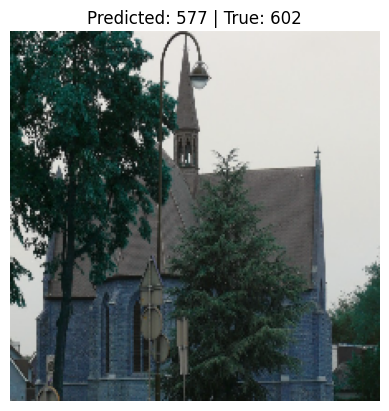

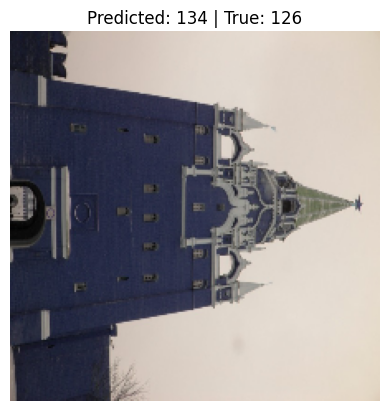

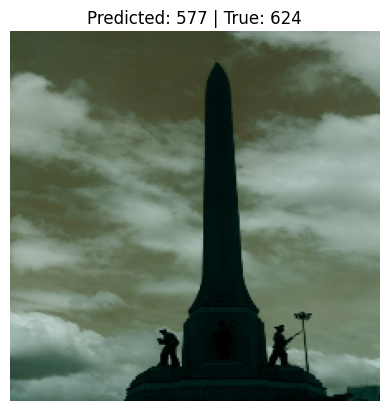

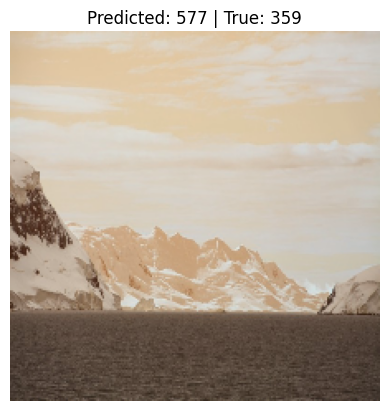

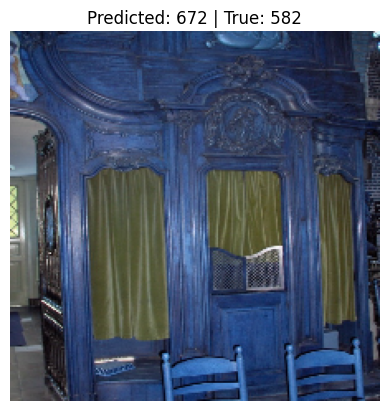

In [13]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model

csv_path = "/content/landmarks-micro/gldv2_micro/train.csv"
image_dir = "/content/landmarks-micro/gldv2_micro/images"
df = pd.read_csv(csv_path)
df["filepath"] = df["filename"].apply(lambda x: os.path.join(image_dir, x))
sample_df = df.sample(1000, random_state=42)

images, labels = [], []
for _, row in sample_df.iterrows():
    path = row["filepath"]
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224)) / 255.0
        images.append(img)
        labels.append(row["landmark_id"])

X = np.array(images)
y_raw = np.array(labels)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(np.unique(y)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=16)

preds = model.predict(X_val)
classes = np.argmax(preds, axis=1)

for i in range(min(5, len(X_val))):
    plt.imshow((X_val[i] * 255).astype(np.uint8))
    plt.axis('off')
    plt.title(f"Predicted: {classes[i]} | True: {y_val[i]}")
    plt.show()
